In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager

In [4]:
FILE_PATH = "./data/"

# 학습 데이터, 테스트 데이터, 제출 데이터 셈플 load
train_data = pd.read_csv(FILE_PATH + 'train.csv', encoding='cp949')
test_data = pd.read_csv(FILE_PATH + 'test.csv', encoding='cp949')
sub_data = pd.read_csv(FILE_PATH + 'sample_submission.csv', encoding='cp949')

In [31]:
# 기본 정보 출력 클래스
class Information:
    def __init__(self):
        self.SMALL_SIZE = 7

    def _set_kor_font(self):
        # 한글 폰트 설정
        self.FONT_PATH = "./NanumSquareB.ttf"
        self.FONT_NAME = font_manager.FontProperties(fname=self.FONT_PATH).get_name()
        plt.rc('font', family=self.FONT_NAME)

    # 데이터의 기본정보를 출력하는 함수
    def print_basic_info(self, data):
        """
        :param data: (DataFrame) data
        :return: None
        """
        # 한글 폰트 설정
        self._set_kor_font()

        print("Data shape : ", data.shape, end='\n\n')
        print(data.info(), end='\n\n')
        print("Data Null Sum Percent \n", round(data.isnull().sum()/data.shape[0] * 100, 2), end='\n\n')

    # 수치형 데이터의 평균, 중위값 등 기본적 통계 지표를 출력하는 함수
    def print_statistics_ind(self, data, col_name, qlt=False):
        """
        :param data: (DataFrame) data
        :param col_name: (str) Column name for which you want to see indicators
        :param qlt: (bool) If column is qualitative variable, this parameter is true
        :return: None
        """
        # 한글 폰트 설정
        self._set_kor_font()

        # 질적변수인 경우
        if qlt:
            print("Data category: ", data[col_name].unique())
            print("Data category: ", data[col_name].value_counts(sort=False).values)

            x_feature_ratio = data[col_name].value_counts(sort=False)
            x_feature_index = x_feature_ratio.index

            # x값 시각화
            plt.plot(aspect='auto')
            plt.pie(x_feature_ratio, labels=x_feature_index, autopct='%1.1f%%')
            plt.title(str(col_name) + '\'s ratio in total')

            plt.show()

        # 양적 변수인 경우
        else:
            print("Data Max : ", data[col_name].max())
            print("Data Min : ", data[col_name].min())
            print("Data Mean : ", data[col_name].mean())
            print("Data Median : ", data[col_name].median())
            print("Data Top 05% : ", np.percentile(data[col_name].values, 95))
            print("Data Top 25% : ", np.percentile(data[col_name].values, 75))
            print("Data Top 75% : ", np.percentile(data[col_name].values, 25))
            print("Data Top 95% : ", np.percentile(data[col_name].values, 5))
            print("Data Variance : {0: .3f}".format(data[col_name].var()))
            print("Data Standard deviation: {0: .3f}".format(data[col_name].std()))
            print()

            plt.plot()
            plt.boxplot(data[col_name])

            plt.show()

In [6]:
# train data head
train_data.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [7]:
# test data head
test_data.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# sample submission data head
sub_data.head()

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0


In [13]:
# 학습 데이터 기본 정보 출력
info.print_basic_info(train_data)

Data shape :  (122400, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
num           122400 non-null int64
date_time     122400 non-null object
전력사용량(kWh)    122400 non-null float64
기온(°C)        122400 non-null float64
풍속(m/s)       122400 non-null float64
습도(%)         122400 non-null float64
강수량(mm)       122400 non-null float64
일조(hr)        122400 non-null float64
비전기냉방설비운영     122400 non-null float64
태양광보유         122400 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB
None

Data Null Sum Percent 
 num           0.0
date_time     0.0
전력사용량(kWh)    0.0
기온(°C)        0.0
풍속(m/s)       0.0
습도(%)         0.0
강수량(mm)       0.0
일조(hr)        0.0
비전기냉방설비운영     0.0
태양광보유         0.0
dtype: float64



In [15]:
# 테스트 데이터 기본 정보 출력
info.print_basic_info(test_data)

Data shape :  (10080, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
num             10080 non-null int64
date_time       10080 non-null object
기온(°C)          3360 non-null float64
풍속(m/s)         3360 non-null float64
습도(%)           3360 non-null float64
강수량(mm, 6시간)    1680 non-null float64
일조(hr, 3시간)     3360 non-null float64
비전기냉방설비운영       2296 non-null float64
태양광보유           1624 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB
None

Data Null Sum Percent 
 num              0.00
date_time        0.00
기온(°C)          66.67
풍속(m/s)         66.67
습도(%)           66.67
강수량(mm, 6시간)    83.33
일조(hr, 3시간)     66.67
비전기냉방설비운영       77.22
태양광보유           83.89
dtype: float64



Data Max :  17739.225
Data Min :  0.0
Data Mean :  2324.8308658684296
Data Median :  1700.352
Data Top 05% :  6460.931519999997
Data Top 25% :  2780.487
Data Top 75% :  1055.268
Data Top 95% :  536.76
Data Variance :  4239478.224
Data Standard deviation:  2058.999



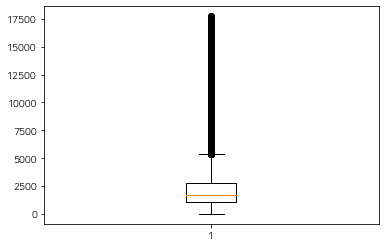

In [32]:
info.print_statistics_ind(train_data, '전력사용량(kWh)')

Data Max :  36.3
Data Min :  11.1
Data Mean :  24.25171323529616
Data Median :  24.2
Data Top 05% :  30.1
Data Top 25% :  26.5
Data Top 75% :  21.8
Data Top 95% :  18.9
Data Variance :  11.614
Data Standard deviation:  3.408



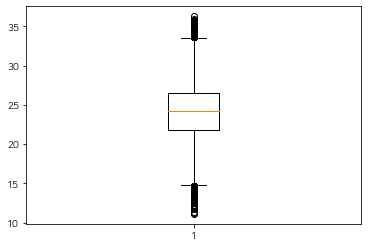

In [33]:
info.print_statistics_ind(train_data, '기온(°C)')

Data Max :  20.1
Data Min :  0.0
Data Mean :  2.1516405228759043
Data Median :  1.9
Data Top 05% :  4.9
Data Top 25% :  2.9
Data Top 75% :  1.1
Data Top 95% :  0.3
Data Variance :  2.294
Data Standard deviation:  1.514



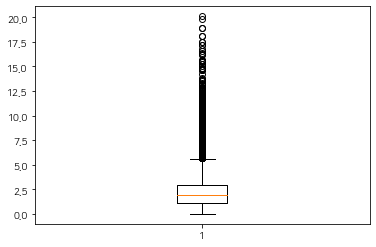

In [34]:
info.print_statistics_ind(train_data, '풍속(m/s)')

Data Max :  100.0
Data Min :  19.0
Data Mean :  80.16984803921568
Data Median :  84.0
Data Top 05% :  99.0
Data Top 25% :  93.0
Data Top 75% :  70.0
Data Top 95% :  50.0
Data Variance :  241.052
Data Standard deviation:  15.526



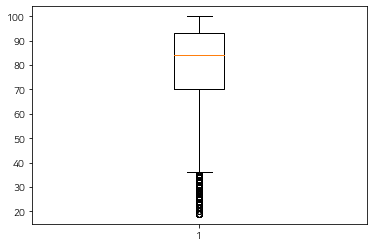

In [35]:
info.print_statistics_ind(train_data, '습도(%)')

Data Max :  81.5
Data Min :  0.0
Data Mean :  0.514989379084945
Data Median :  0.0
Data Top 05% :  2.3
Data Top 25% :  0.0
Data Top 75% :  0.0
Data Top 95% :  0.0
Data Variance :  6.888
Data Standard deviation:  2.625



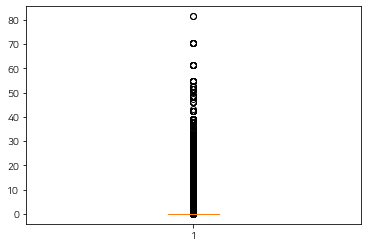

In [36]:
info.print_statistics_ind(train_data, '강수량(mm)')

Data Max :  1.0
Data Min :  0.0
Data Mean :  0.21353349673202346
Data Median :  0.0
Data Top 05% :  1.0
Data Top 25% :  0.3
Data Top 75% :  0.0
Data Top 95% :  0.0
Data Variance :  0.137
Data Standard deviation:  0.371



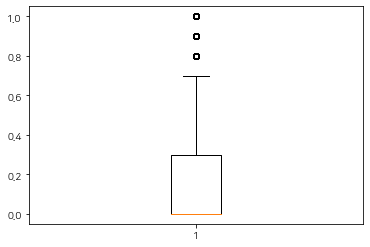

In [37]:
info.print_statistics_ind(train_data, '일조(hr)')

Data category:  [0. 1.]
Data category:  [38760 83640]


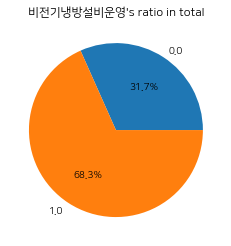

In [38]:
info.print_statistics_ind(train_data, '비전기냉방설비운영', qlt=True)

Data category:  [0. 1.]
Data category:  [63240 59160]


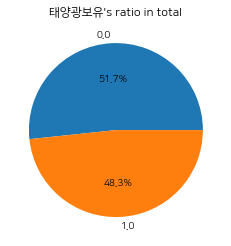

In [39]:
info.print_statistics_ind(train_data, '태양광보유', qlt=True)

In [6]:
corr = train_data.corr(method='pearson')
corr

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량(kWh),-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온(°C),0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속(m/s),-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도(%),0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
강수량(mm),-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
일조(hr),-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
비전기냉방설비운영,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
태양광보유,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000


In [7]:
type(corr)

pandas.core.frame.DataFrame